In [1]:
import gensim.downloader
import pandas as pd
import numpy as np
import torch
import random
from nltk.tokenize import word_tokenize
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
import datasets
import matplotlib.pyplot as plt

# enabling inline plots in Jupyter
%matplotlib inline
datasets.logging.set_verbosity_error()

# Setting seed for both 
random.seed(1306) # For the random number generator
np.random.seed(1306) # Specifically for our numpy module

c:\Users\asger\AppData\Local\pypoetry\Cache\virtualenvs\advanced_social_data-1nT6mJ2B-py3.11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Part 4: Word embeddings

BLABLABLABAL MÅSKE NOGET HER???

## Train your own word2vec vectors on the dataset. We recommend a vector size of 200, a window of 5, and three epochs of training. Make sure you tokenize and lowercase the words before feeding them into the model. 

To load and train a word2vec on United General Debate session from 2022. In the following code we start by loading the data and cleaning it. Here we drop empty lines, lower case all the words, and tokenizes. 

In [2]:
def load_and_process_data(filename):
    # Create an empty list to hold all sentences in the corpus
    corpus = []
    
    # Open the file and iterate over lines
    with open(filename, "r", encoding="utf-8") as f:
        for line in f:
            # Check that the line is not empty
            if line.strip() == '':
                continue
            # Tokenize and lowercase the string
            encoded_text = [word.lower() for word in word_tokenize(line)]
            # Add the list of tokens to the corpus
            corpus.append(encoded_text)
    
    return corpus

# Use the function to load and process the data
path = "dataset"
speeches = load_and_process_data(path+"/allspeeches_77_2022.txt")


After we have prepared the data we can now initialise the word2vec. This model has numerous specifications, and besides fellowing the given directions, we also set a seed, select the skip-gram model and choose to ignore low frequency words. 

In [3]:
def vec_function(seed):
    speech2vec = gensim.models.Word2Vec(
        speeches,         # the corpus object we've loaded
        vector_size=200,  # the dimensionality of the target vectors
        window=5,         # window ngram size
        min_count=4,      # ignoring low-frequency words
        epochs=3,         # how many training passes to have
        sg = 1,           # 1 for skip-gram model, 0 for cbow
        seed=seed)        # Set seed for 2vec, to be able to replicate the data¨
    return(speech2vec)
vec_seed13 = vec_function(seed=13)

(SKAL NOK BARE UD)
As embeddings are in general a very high-dimensional matrix it is possible to apply an algorithm and to some degree visualise the relation in the text corpus between the different words. In the following use the algorithm t-SNE, to get a overview of the relation on our word2vec and the general words. It is not apparent that any kind of cluster exist. 

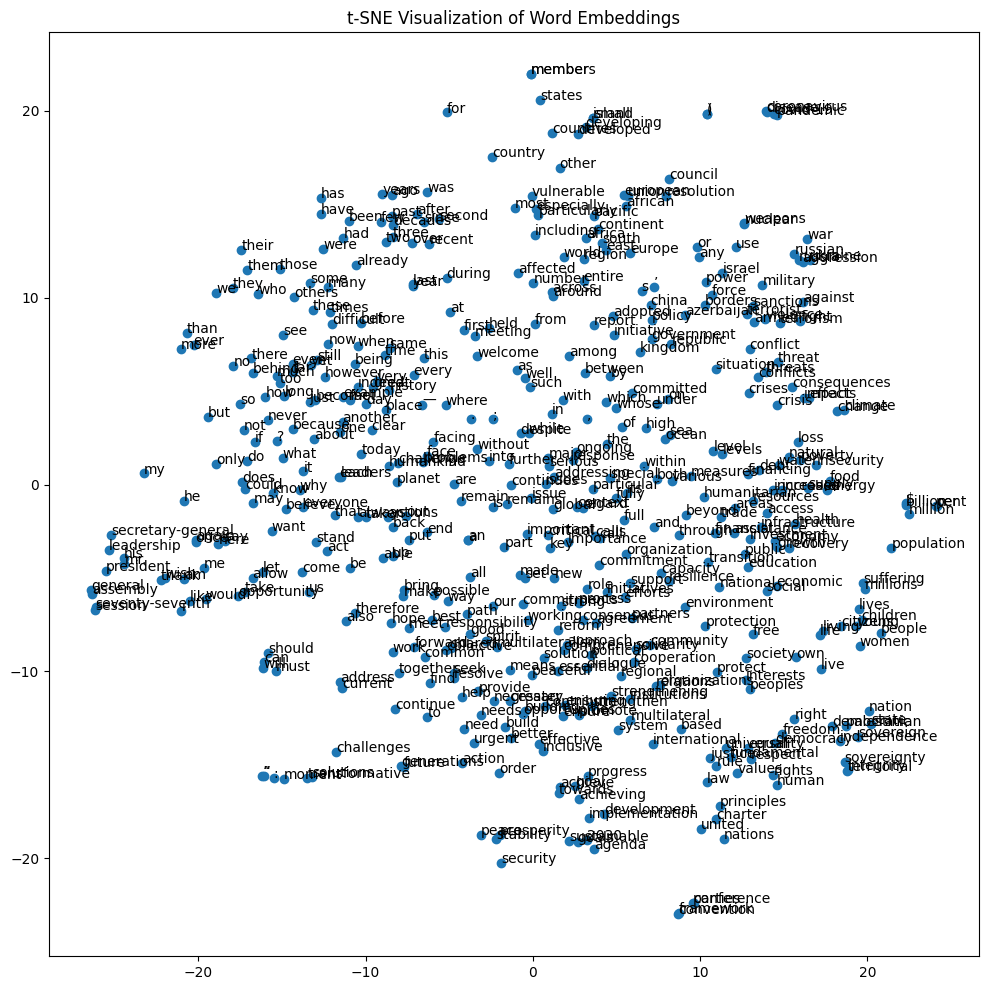

In [32]:
# T-SNE of Word2Vec (SKAL NOK UD)

embedding =  vec_seed13

# Get first 200 words for visualization
words = list(embedding.wv.key_to_index.keys())[:500]

# Get the corresponding vectors for the words
word_vectors = embedding.wv[words]

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
reduced_vectors = tsne.fit_transform(word_vectors)

# Extract x and y coordinates
x_coords = reduced_vectors[:, 0]
y_coords = reduced_vectors[:, 1]

# Plot the embeddings
plt.figure(figsize=(12, 12))
plt.scatter(x_coords, y_coords)

# Add labels for each point
for i, word in enumerate(words):
    plt.annotate(word, (x_coords[i], y_coords[i]))

plt.title('t-SNE Visualization of Word Embeddings')
plt.show()


## Print out the ten words that are most similar to: “climate”, “pandemic”, “terrorism” and “future” (or choose your own four words of interest). Briefly discuss anything you find noteworthy about the associations that the model has picked up.

In [18]:
# Looking for the ten words which are closest to climate, pandemic, terrorism, future
word_of_interest = ["gender", "elizabeth", "russia", "ukraine"] 

# Constructing a function for finding the top ten most similar words
def find_top_words(word_of_interest, model):
    df = pd.DataFrame() 
    for word in word_of_interest:
        similar_words = list(map(lambda x: x[0], model.wv.most_similar(word, 10))) # Using the most_similar function to find the 10 words
        df[word] = similar_words
    return(df) # Returning a dataframe

top_words_seed13 = find_top_words(word_of_interest = word_of_interest, model= vec_seed13)
top_words_seed13

,gender,elizabeth,russia,ukraine
0,empowerment,king,ukraine,russia
1,protection,majesty,military,aggression
2,areas,abdulla,illegal,military
3,quality,queen,aggression,russian
4,youth,charles,russian,illegal
5,employment,congratulating,federation,armed
6,technical,abdullah,invasion,war
7,public,iii,war,sanctions
8,women,excellency,iran,iran
9,participation,shahid,unprovoked,federation


As we shortly touched upon above is word embeddings a high dimensional matrix. There might 

In the above model we have chosen the four themes in relation to 2022, climate, ukrain, elizabeth and future. We have chosen four words of interest: 
The first word is `gender`, analysing on the ten words we see that empowerment and protection are the two most similar words. On a more broad note is it interesting that men is not a similar word to gender but `women` is. A Beauvoirian notion regarding this would be that men is again considered the 'default' the gender, and women is the 'other', or what we actually speak about when talking gender. 
The second word we look up is `elisabeth`, this is specifically with regards to her death in 2022. It makes sence that `king`, `charles`, and `iii` all are close to this since this probably refer to her son King Charles III. The `abdulla`/`abdullah` and `shahid` words probably refer to the Abdullah Shahid a key politician within the UN. 
The last two words which we included is `russia` and `ukraine` because 2022 was when russia attacked ukraine. Both countries has each other as the most similar, and in general has multiple words in common and all of then in some way or another related to the war. It is interesting that ukraine has the word 'sanction' which probably also relates to their call for sanctions towards russia, and 'armed' which could be related to their need for support for defending themselves.  

3: Suppose that we would like to use these word embeddings as input in a supervised model, detecting whether the speech comes from a country in the global North or the global South. Briefly discuss the upside(s) and downside(s) of training your word embeddings locally, on the speeches themselves, versus using pre-trained embeddings.

Upsides: Se Rodriguez, P. L., & Spirling, A. (2022). Side 6!!

Downsides: 


4: (optional) Train the model again (set a different random seed if you used a seed in step 1), print the most similar words again, and compare your two results. Are the word embeddings stable?


In [20]:
vec_seed12 = vec_function(seed=12)
top_words_seed12 = find_top_words(word_of_interest= word_of_interest, model=vec_seed12)
top_words_seed12

,children,men,women,guns
0,women,women,girls,able
1,girls,girls,children,forced
2,lives,children,young,received
3,millions,young,empowerment,undertaken
4,thousands,lives,lives,roads
5,young,millions,rights,lifted
6,million,homes,gender,encouraged
7,homes,thousands,millions,flee
8,displaced,dignity,men,paid
9,refugees,citizens,dignity,homes


Probably not. 

5: (optional) Conduct an informal validation of the embeddings from your first run, by checking their ability to find the “odd one out” in three different series of four–five terms related to international relations and current events (e.g. “covid”, “pandemic”, “disease”, “vaccine”, “environment”). Briefly discuss how you might validate the embeddings more systematically, if you had more time and resources. 

In [72]:
list_of_lists_of_words = {
    "war": ["bombs", "guns", "kill", "refugees"],
    "climate": ["cyclones", "drought", "floods", "heatwave"],
    "nations": ["china", "russia", "america", "denmark"]
}
for key, value in list_of_lists_of_words.items():
    print(f"For '{key}' the odd one out is: {vec_seed12.wv.doesnt_match(value)}")

For 'war' the odd one out is: refugees
For 'climate' the odd one out is: cyclones
For 'nations' the odd one out is: russia


#### SKRALD


In [ ]:
# Constructing the DataLoader for preparing data for the word2vec

class MyDataLoader(object):

    # when we initialize this dataloader, it will take a filename as an argument
    def __init__(self, filename):
        self.corpus = filename

    # we will need to define what counts as a "chunk" in this file, so when the
    # Dataloader is loading (iterating over) the file and feeding it to the embedding
    # model, it knows what to treat as one unit. Here, we (arbitrarily) say that one
    # line in the file (corresponding to a paragraph) is one chunk.
    def __iter__(self):
        for line in open(self.corpus, "r", encoding="utf-8"): # lines are split by "\n"
            # check that the line is not empty (if it is, do nothing):
            if line == None:
                continue
            # tokenize and lowercase the string before yielding it
            encoded_text = []
            tokens = word_tokenize(line)
            for t in tokens:
                index = t.lower()
                encoded_text.append(index)
            # the output must be a list of tokens in the line
            yield encoded_text

# Loading and cleaning the data
path = "dataset"
speeches_test = MyDataLoader(path+"/allspeeches_77_2022.txt")